# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{base_url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skip This")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | bosobolo
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | labuan
Processing Record 9 of Set 1 | matoury
Processing Record 10 of Set 1 | itaituba
Processing Record 11 of Set 1 | qamdo
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | taiohae
City not found. Skip This
Processing Record 14 of Set 1 | notodden
Processing Record 15 of Set 1 | knjazevac
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | sombrio
Processing Record 

Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | hobyo
Processing Record 45 of Set 4 | vila do maio
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | sferracavallo
Processing Record 48 of Set 4 | haiku-pauwela
Processing Record 49 of Set 4 | berezovyy
Processing Record 0 of Set 5 | ust'-kulom
Processing Record 1 of Set 5 | baikunthpur
Processing Record 2 of Set 5 | oeiras
Processing Record 3 of Set 5 | novodvinsk
Processing Record 4 of Set 5 | san antonio de pale
Processing Record 5 of Set 5 | toamasina
Processing Record 6 of Set 5 | ironwood
Processing Record 7 of Set 5 | loveland
Processing Record 8 of Set 5 | guilin
Processing Record 9 of Set 5 | nagqu
Processing Record 10 of Set 5 | 'ohonua
City not found. Skip This
Processing Record 11 of Set 5 | martapura
Processing Record 12 of Set 5 | chinchilla
Processing Record 13 of Set 5 | bamboo flat
Processing Record 14 of Set 5 | el alamo
Processing Record 15 of Set 5 | greymouth
Processin

Processing Record 37 of Set 8 | tralee
Processing Record 38 of Set 8 | lawas
Processing Record 39 of Set 8 | toliara
Processing Record 40 of Set 8 | rouissat
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | enewetak
Processing Record 43 of Set 8 | tekkali
Processing Record 44 of Set 8 | mudanjiang
Processing Record 45 of Set 8 | daru
Processing Record 46 of Set 8 | saki
Processing Record 47 of Set 8 | tocopilla
Processing Record 48 of Set 8 | fort bragg
Processing Record 49 of Set 8 | hobbs
Processing Record 0 of Set 9 | galliano
Processing Record 1 of Set 9 | koulamoutou
Processing Record 2 of Set 9 | mount gambier
Processing Record 3 of Set 9 | al mindak
Processing Record 4 of Set 9 | nova vicosa
Processing Record 5 of Set 9 | alice
Processing Record 6 of Set 9 | pisco
Processing Record 7 of Set 9 | hasaki
Processing Record 8 of Set 9 | najran
Processing Record 9 of Set 9 | tromso
Processing Record 10 of Set 9 | iron river
Processing Record 11 of Set 9 | bandar

Processing Record 28 of Set 12 | atar
Processing Record 29 of Set 12 | mahina
Processing Record 30 of Set 12 | villaguay
Processing Record 31 of Set 12 | gidam
Processing Record 32 of Set 12 | delta
Processing Record 33 of Set 12 | mont-laurier
Processing Record 34 of Set 12 | chandler
Processing Record 35 of Set 12 | port shepstone
Processing Record 36 of Set 12 | oguz
Processing Record 37 of Set 12 | yerofey pavlovich
Processing Record 38 of Set 12 | jora
Processing Record 39 of Set 12 | massawa
Processing Record 40 of Set 12 | villa la angostura
Processing Record 41 of Set 12 | las tablas
Processing Record 42 of Set 12 | norderney
Processing Record 43 of Set 12 | kedrovyy
Processing Record 44 of Set 12 | kaitong
Processing Record 45 of Set 12 | florence
Processing Record 46 of Set 12 | kourou
Processing Record 47 of Set 12 | bereeda
Processing Record 48 of Set 12 | sake
Processing Record 49 of Set 12 | tadine
Processing Record 0 of Set 13 | cuorgne
Processing Record 1 of Set 13 | po

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,9.69,62,95,11.99,SH,1696180823
1,port-aux-francais,-49.3500,70.2167,6.26,97,100,19.13,TF,1696180815
2,yellowknife,62.4560,-114.3525,8.29,88,75,6.17,CA,1696180549
3,ust-nera,64.5667,143.2000,-2.20,62,31,3.42,RU,1696180821
4,bosobolo,4.1833,19.9000,26.15,79,54,0.92,CD,1696180951


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data",index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,9.69,62,95,11.99,SH,1696180823
1,port-aux-francais,-49.3500,70.2167,6.26,97,100,19.13,TF,1696180815
2,yellowknife,62.4560,-114.3525,8.29,88,75,6.17,CA,1696180549
3,ust-nera,64.5667,143.2000,-2.20,62,31,3.42,RU,1696180821
4,bosobolo,4.1833,19.9000,26.15,79,54,0.92,CD,1696180951


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

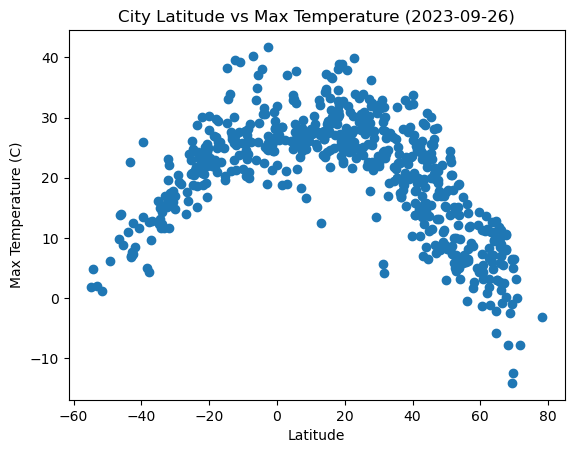

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude Vs. Humidity

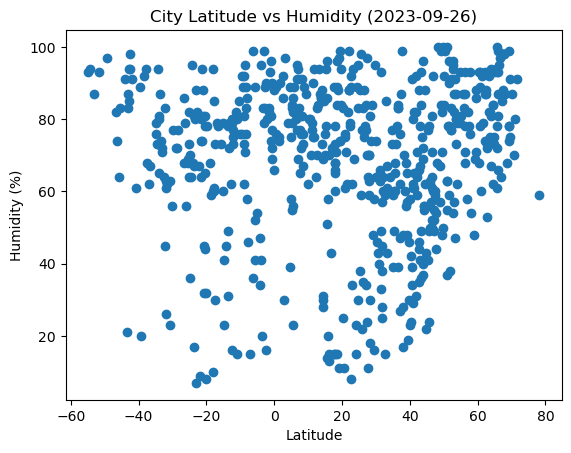

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

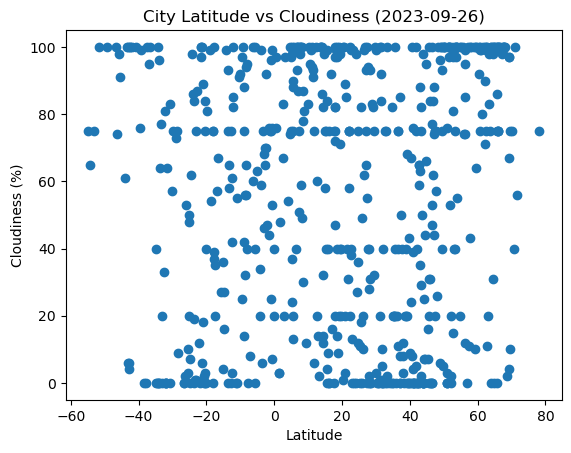

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

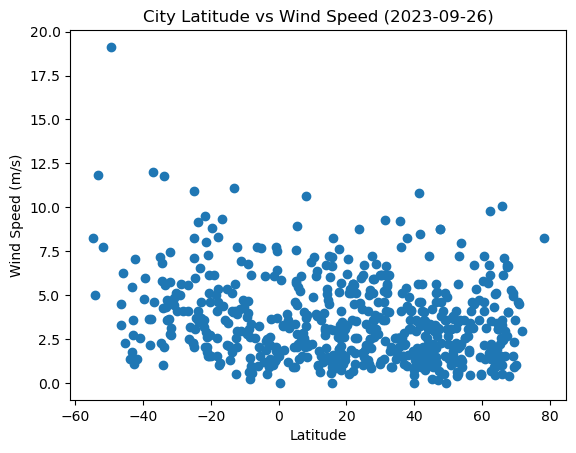

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots


  #(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    
    
    #regress_values = x_axis * slope + intercep

    
    #plt.scatter(x_axis, y_axis)
    
    
    #plt.plot(x_axis, regress_values, color="red")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,8.29,88,75,6.17,CA,1696180549
3,ust-nera,64.5667,143.2000,-2.20,62,31,3.42,RU,1696180821
4,bosobolo,4.1833,19.9000,26.15,79,54,0.92,CD,1696180951
6,la ronge,55.1001,-105.2842,7.14,81,100,2.57,CA,1696180883
7,labuan,5.2767,115.2417,27.63,79,100,7.58,MY,1696180952


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,9.69,62,95,11.99,SH,1696180823
1,port-aux-francais,-49.3500,70.2167,6.26,97,100,19.13,TF,1696180815
5,west island,-12.1568,96.8225,25.99,73,100,7.72,CC,1696180820
9,itaituba,-4.2761,-55.9836,38.09,47,20,1.18,BR,1696180921
11,adamstown,-25.0660,-130.1015,20.64,82,50,10.95,PN,1696180818


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7860212747738102
---------------------------------
Observations:
As latitude increases, indicating a departure from the equator, there exists an inversely proportional relationship with temperature, resulting in a temperature decrease..


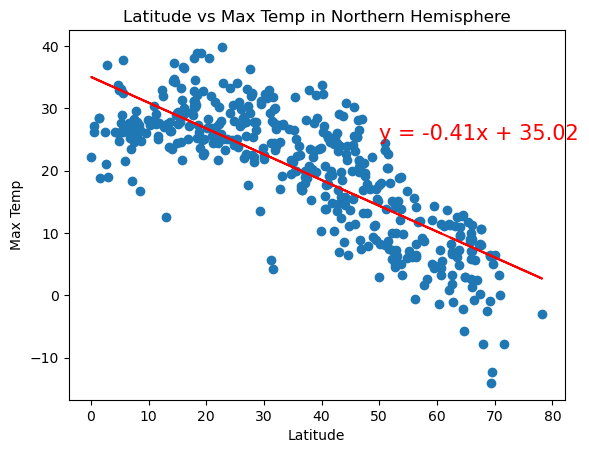

<Figure size 640x480 with 0 Axes>

In [55]:
# Linear regression on Northern Hemisphere


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(50,25),xytext=(50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("As latitude increases, indicating a departure from the equator, there exists an inversely proportional relationship with temperature, resulting in a temperature decrease..")
plt.show()
#Save the figure
plt.savefig("output_data")

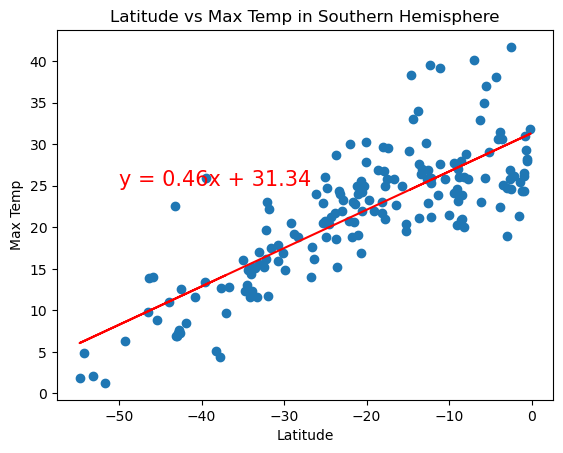

The r-value is: 0.8028757695187752
---------------------------------
Observations:An observed correlation exists between temperature and latitude, where temperature rises as one moves closer to the


<Figure size 640x480 with 0 Axes>

In [58]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,25),xytext=(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp in Southern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:An observed correlation exists between temperature and latitude, where temperature rises as one moves closer to the")
plt.show()

#Save the figure
plt.savefig("output_data")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1212145754953126
---------------------------------
Observations:
There is a slightly positive relationship between humidity and latitude.


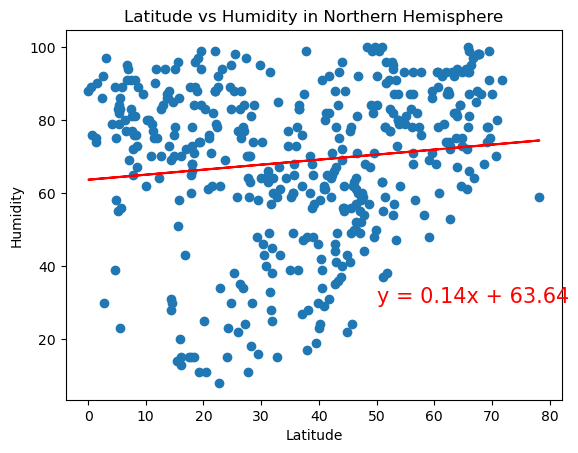

<Figure size 640x480 with 0 Axes>

In [60]:
# Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(50,30),xytext=(50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("A modestly favorable correlation exists between humidity and latitude.)
plt.show()
#Save the figure
plt.savefig("output_data")

The r-value is: -0.11694932847229833
---------------------------------
There is a slightly negative relationship between humidity and latitude.


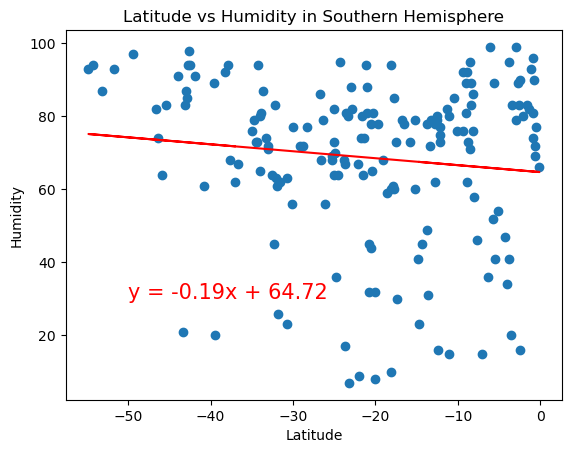

<Figure size 640x480 with 0 Axes>

In [61]:
# Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,30),xytext=(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Southern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")

print("There is a slightly negative relationship between humidity and latitude.")
plt.show()
#Save the figure
plt.savefig("output_data")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09409027720490232
---------------------------------
There is no correlation between latitude and cloudiness.


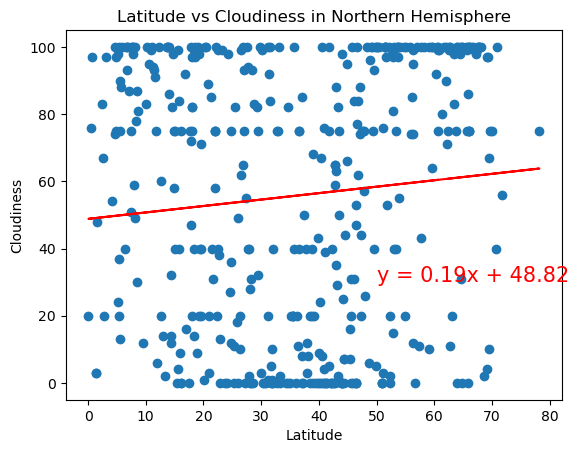

<Figure size 640x480 with 0 Axes>

In [62]:
# Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(50,30),xytext=(50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")

print("There is no correlation between latitude and cloudiness.")
plt.show()
#Save the figure
plt.savefig("output_data")

The r-value is: -0.029813233625205656
---------------------------------
There is no correlation between latitude and cloudiness.


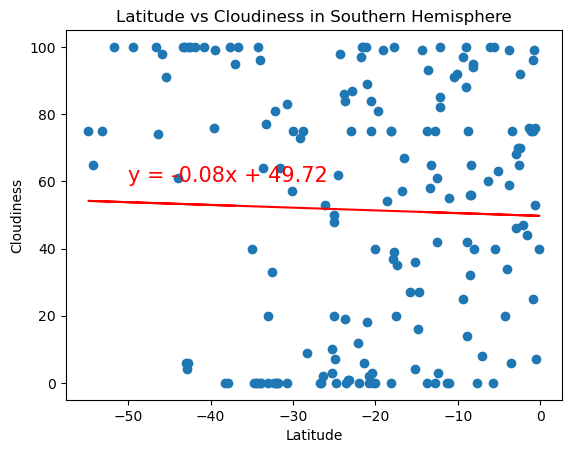

<Figure size 640x480 with 0 Axes>

In [63]:
# Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,60),xytext=(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")


print("There is no correlation between latitude and cloudiness.")
plt.show()
#Save the figure
plt.savefig("output_data")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0525280561286287
---------------------------------
There is no correlation between latitude and wind speed.


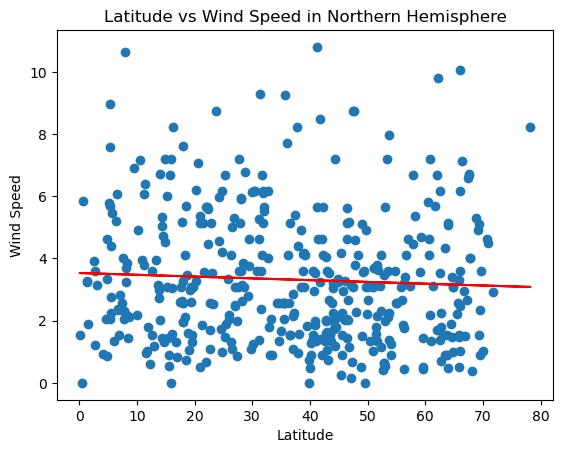

<Figure size 640x480 with 0 Axes>

In [64]:
# Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(10,12),xytext=(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")

print("There is no correlation between latitude and wind speed.")
plt.show()
#Save the figure
plt.savefig("output_data")

The r-value is: -0.28741953384275526
---------------------------------
There is no correlation between latitude and wind speed.


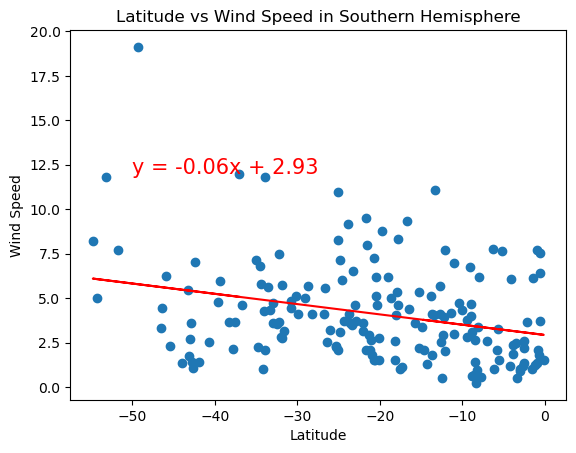

<Figure size 640x480 with 0 Axes>

In [65]:
# Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,12),xytext=(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")

print("There is no correlation between latitude and wind speed.")
plt.show()
#Save the figure
plt.savefig("output_data")

**Discussion about the linear relationship:** YOUR RESPONSE HERE